<a href="https://colab.research.google.com/github/chandra-prakash-khudia/DeepLearning/blob/main/buildDeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import copy

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

In [ ]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache

**relu_backward Function Explanation:
This function is a crucial part of training a neural network. It calculates the gradient of the cost function with respect to the input of a Rectified Linear Unit (ReLU) activation function during the backpropagation process. In simpler terms, it helps the network learn by figuring out how much to adjust its internal parameters to reduce errors.

Purpose: The primary goal of relu_backward is to compute dZ, representing how much the cost changes with a small change in the input to the ReLU function (Z).

How it Works:

Input:

dA: The gradient of the cost with respect to the output of the ReLU function. It shows how much the overall error changes with a tiny change in the ReLU's output.
cache: This stores the original input Z that was passed to the ReLU function during the forward pass (when the network made its initial prediction). This is needed to calculate the gradient efficiently.
Calculations:

Z = cache: This line retrieves the original input Z from the cache.
dZ = np.array(dA, copy=True): This creates a copy of dA and assigns it to dZ. This ensures we don't modify the original dA by mistake.
dZ[Z <= 0] = 0: This is the core logic of the ReLU's backpropagation. If the original input Z was less than or equal to 0, it means the ReLU function outputted 0. In this case, we set the gradient dZ to 0 as well. This reflects the fact that the ReLU function doesn't change its output for negative inputs, so it doesn't contribute to the error in those cases.
Output:

dZ: The calculated gradient of the cost with respect to Z. This value is used to update the weights and biases in the previous layers of the neural network during training.**

In [ ]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

**sigmoid_backward Function Explanation:
This function calculates the gradient of the cost function with respect to the input of a sigmoid activation function during the backpropagation process in a neural network. Backpropagation is how neural networks learn by adjusting their internal parameters to minimize errors.

Here's a step-by-step explanation:

Purpose: The primary goal of sigmoid_backward is to compute dZ, which represents the gradient of the cost with respect to Z. This gradient is crucial for updating the weights and biases of the neural network during training.

Input:

dA: This is the gradient of the cost with respect to the activation (output) of the sigmoid function. It represents how much the cost changes with a small change in the activation.
cache: This is a variable that stores the original input Z to the sigmoid function from the forward pass. It's needed to calculate the gradient efficiently.
Calculation:

Z = cache: This line retrieves the original input Z from the cache.
s = 1/(1+np.exp(-Z)): This calculates the sigmoid activation of Z, which is the same as what was calculated during the forward pass. This is often represented by the symbol 'σ' (sigma).
dZ = dA * s * (1-s): This is the core of the backpropagation calculation for the sigmoid function. It calculates the gradient dZ using the chain rule of calculus. It essentially says:
The gradient of the cost with respect to Z (dZ) is equal to:
The gradient of the cost with respect to the activation (dA) multiplied by
The derivative of the sigmoid function with respect to its input (s * (1-s)).
Output:

dZ: The calculated gradient of the cost with respect to Z. This value will be used to update the weights and biases in the previous layers of the neural network.
Assertion:

assert (dZ.shape == Z.shape): This line checks that the shape of dZ is the same as the shape of Z. This is a sanity check to ensure the calculations are correct.
In simpler terms:

Imagine you have a hill, and you want to find the steepest way down. The cost function represents the height of the hill, and dZ represents the slope of the hill at a specific point (Z). sigmoid_backward helps the neural network find the direction of the steepest descent to minimize the cost (get to the bottom of the hill). It does this by calculating the slope (dZ) based on how much the cost changes (dA) and the properties of the sigmoid function.

I hope this explanation helps! Let me know if you have any further questions.**

In [ ]:
# below code is
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


In [ ]:
print("Test Case 1:\n")
parameters = initialize_parameters(3,2,1)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Test Case 1:

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in network
    for l in range(1,L):
      parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
      parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters




#                            ***Forward Propagation Modulet***
Now that you have initialized your parameters, you can do the forward propagation module. Start by implementing some basic functions that you can use again later when implementing the model. Now, you'll complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$.


In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W,A) + b
    cache = (A,W,b)
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if(activation=="sigmoid"):
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = sigmoid(Z)
    elif activation=="relu":
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

** L_model_forward Function Explanation:
This function performs the forward propagation step for an L-layered neural network. Forward propagation is the process of calculating the output of the network for a given input. This function specifically implements a network with ReLU activations in the hidden layers and a sigmoid activation in the output layer.

Purpose:

The function takes the input data (X) and the network's parameters (parameters) and computes the final output of the network (AL) along with intermediate values stored in caches.

How it Works:

Initialization:

caches = []: Creates an empty list called caches to store intermediate values that will be needed for backpropagation later.
A = X: Assigns the input data (X) to the variable A, which will represent the activation of the current layer as we move through the network.
L = len(parameters) // 2: Calculates the number of layers in the network (L) based on the number of parameter sets (weights and biases) in the parameters dictionary. We divide by 2 because each layer has two sets of parameters (W and b).
Forward Pass through Hidden Layers:

for l in range(1, L):: This loop iterates through the hidden layers of the network (from layer 1 to layer L-1).
A_prev = A: Stores the activation of the previous layer in A_prev.
A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu"): This line performs the forward pass for a single layer:
It calls the linear_activation_forward function with the activation from the previous layer (A_prev), the weights (parameters['W' + str(l)]), the biases (parameters['b' + str(l)]), and the activation function ("relu").
The linear_activation_forward function calculates the linear transformation (Z = WA + b) and then applies the ReLU activation function to get the activation of the current layer (A).
It also returns a cache containing intermediate values.
caches.append(cache): Adds the cache for the current layer to the caches list.
Forward Pass through Output Layer:

AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid"): This line performs the forward pass for the output layer, similar to the hidden layers but using the sigmoid activation function. The output is stored in AL.
caches.append(cache): Adds the cache for the output layer to the caches list.
Return:

return AL, caches: The function returns the final output of the network (AL) and the list of caches (caches).**

In [ ]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    caches = []
    A=X
    L= len(parameters)//2
    # implement [Linear->relu]*(L-1) Addd "cache" to the "cache" lsit
    for l in range(1,L):
      A_prev = A
      A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b' + str(l)],activation = "relu")
      caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters['W'+str(l)], parameters['b'+str(L)], activation = "sigmoid")
    caches.append(cache)
    return AL, caches

<a name='5'></a>
## 5 - Cost Function

Now you can implement forward and backward propagation! You need to compute the cost, in order to check whether your model is actually learning.

<a name='ex-6'></a>
###  compute_cost
Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$

In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by above equation .

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    cost = (-1/m)*np.sum(np.multiply(Y,np.log(AL) + np.multiply(1-Y, np.log(1-AL))))
    cost = np.squeeze(cost)      #To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    return cost

**6 - Backward Propagation Module**
Just as you did for the forward propagation, you'll implement helper functions for backpropagation. Remember that backpropagation is used to calculate the gradient of the loss function with respect to the parameters.
›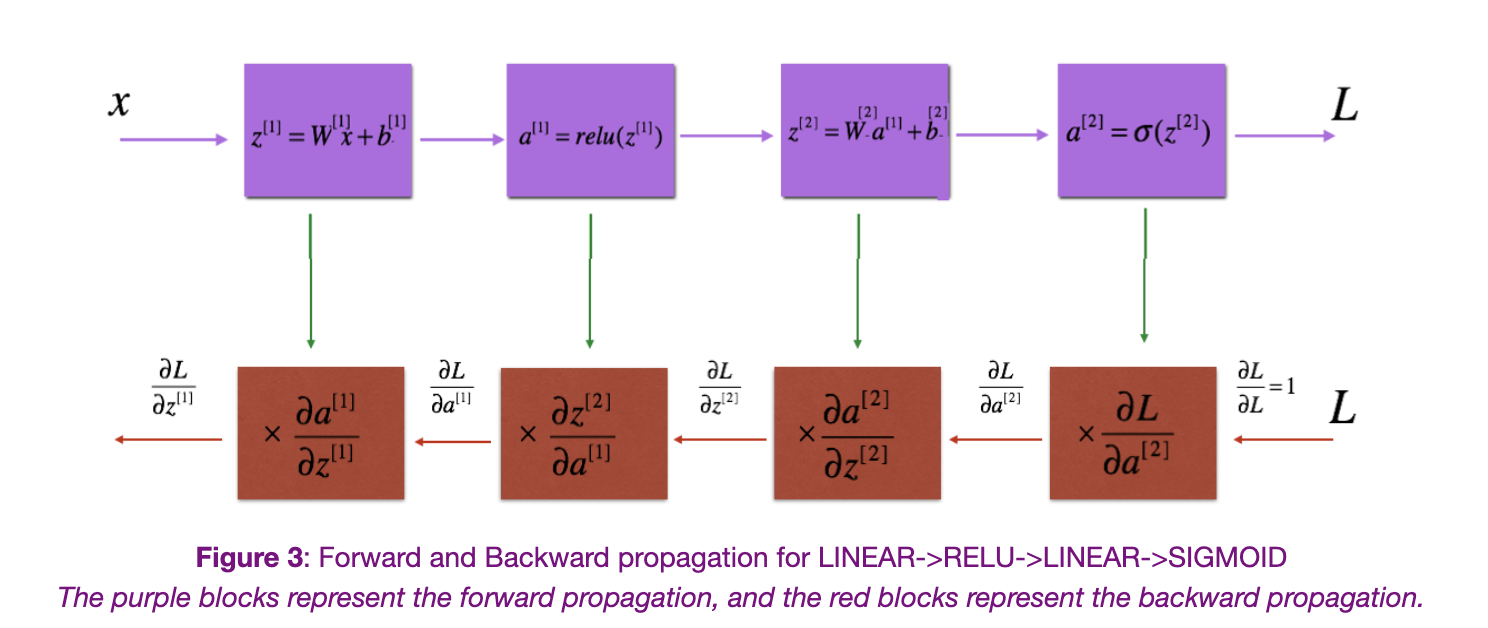



# **Linear Backward**

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center><font color='purple'><b>Figure 4</b></font></center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$.

In [1]:
def linear_backward(dZ, cache):
  """
  Implement the linear portion of backward propagation for a single layer (layer l)

  Arguments:
  dZ -- Gradient of the cost with respect to the linear output (of current layer l)
  cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current
  layer

  Returns:
  dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1),
  dW -- Gradient of the cost with respect to W (current layer l),
  db -- Gradient of the cost with respect to b (current layer l)
  """
  A_prev, W, b = cache
  m = A_prev.shape[1]

  dW = (1/m) * np.dot(dZ, A_prev.T)
  db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T,dZ)
  dA_prev= np.dot(W.T, dZ)
  return dA_prev, dW, db

# **Linear - Activation Backward**

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**.

To help you implement `linear_activation_backward`, two backward functions have been provided:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:
```python
dZ = relu_backward(dA, activation_cache)
```
If $g(.)$ is the activation function,
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). \tag{11}$$  

<a name='ex-8'></a>

In [3]:
def linear_activation_backward(dA, cache, activation):
  """
  Implement the backward propagation for the LINEAR->ACTIVATION layer.

  Arguments:
  dA -- post-activation gradient for current layer l
  cache -- tuple of values (linear_cache, activation_cache)
  activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

  Returns:
  dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1),
  dW -- Gradient of the cost with respect to W (current layer l),
  db -- Gradient of the cost with respect to b (current layer l)
  """
  linear_cache, activation_cache = cache
  if activation == "relu":
    dZ = relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
  elif activation=="sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

  return dA_prev, dW, db



In [4]:
def L_model_backward(AL, Y, caches):
  """
  Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

  Arguments:
  AL -- probability vector, output of the forward propagation (L_model_forward())
  Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
  caches -- list of caches containing:
              every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
              the cache of linear_activation_forward() with "sigmoid" (  it's caches[L-1])

  Returns:
  grads -- A dictionary with the gradients
            grads["dA" + str(l)] = ...
            grads["dW" + str(l)] = ...
            grads["db" + str(l)] = ...
  """
  grads = {}
  L = len(caches) #number of layers
  m = AL.shape[1]
  Y = Y.reshape(AL.shape) # after this line , Y is same shape as AL

  dAL = -(np.divide(Y,AL) - np.divide(1-Y, 1-AL))
  current_cache = caches[L-1]
  grads["dA"+ str(L)], grads["dW" + str(L)], grads["db"+ str(L)] =linear_backward(sigmoid_backward(dAL, current_cache[1]),current_cache[0])

  for l in reversed(range(L-1)):
    current_cache =caches[l]
    dA_prev_temp, dW_temp, db_temp = linear_backward(sigmoid_backward(dAL, current_cache[1]), current_cache[0])
    grads["dA" + str(l + 1)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp

  return grads

In [5]:
def update_parameters(params, grads, learning_rate):
  """
  Update parameters using gradient descent

  Arguments:
  params -- python dictionary containing your parameters
  grads -- python dictionary containing your gradients, output
  learning_rate -- the learning rate, scalar.

  Returns:
  parameters -- python dictionary containing your updated parameters
                parameters["W" + str(l)] = ...
                parameters["b" + str(l)] = ...
  """
  parameters = copy.deepcopy(params)
  L = len(parameters) // 2
  for l in range(L):
      parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
      parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
  return parameters